# Milestone 6

En este *milestone* se estudia el problema circular restringido de los tres cuerpos (en adelante, CRTBP). Para ello, se implementa un método de Runge-Kutta embebido de alto orden para integrar órbitas, que se puede encontrar en `temporal_schemes`. Para llamarlo hay que generar la tabla extendida de Butcher. La función se muestra explícitamente en este notebook, pero también está disponible en `temporal_schemes`. También se calculan las posiciones de los puntos de Lagrange. Las posiciones de los colineales se obtienen resolviendo numéricamente las quínticas de Euler mediante el método de Newton. La estabilidad de estos puntos se obtiene diagonalizando el Jacobiano del sistema y estudiando los puntos críticos. Se concluye que los puntos colineales son tipo centro x centro x silla y los puntos triangulares (L4, L5) son estables (para el sistema Tierra-Luna, puesto que hay una bifurcación en su estabilidad a partir de una masa reducida crítica). También se integra una órbita alrededor de L1 para varios métodos numéricos.  Se observa que los métodos ERK son más adecuados para integrar este tipo de trayectorias respecto a los métodos numéricos de milestones anteriores, en los que los errores se acumulan más rápidamente debido a la inestabilidad del problema, como se ve estudiando el eje Z.

In [27]:
from temporal_schemes_v4 import Euler, Crank_Nicolson, RK4, Inverse_Euler, leapfrog, embedded_RK, Butcher_tableau
from physics_v4 import CRTBP
from stability import stability_point
from plot import plot_CRTBP_velocities, plot_CRTBP_orbits
from roots import newton
from numpy import array, sqrt, concatenate, linspace, zeros
import matplotlib.pyplot as plt

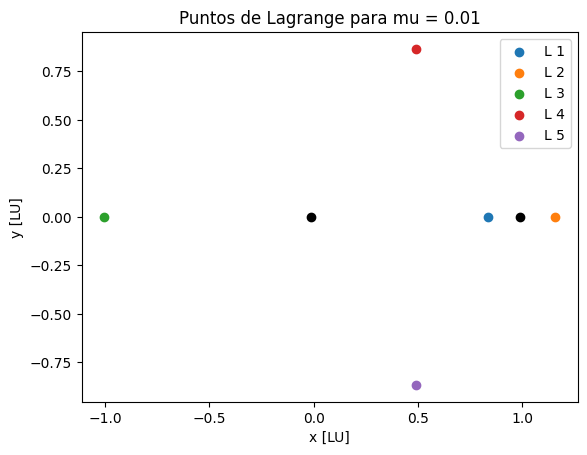

In [16]:
def Lagrange_points_position(mu):
    """
    Devuelve la posición de los 5 puntos de Lagrange.
    Inputs:
    mu: Masa reducida del CRTBP.
    Outputs:
    array de 5x2 con las posiciones ((x,y)_1, (x,y)_2, ..., (x,y)_5) de los puntos de Lagrange
    """
    def l1_poly(gamma):
        return gamma**5 + (mu-3)*gamma**4 + (3-2*mu)*gamma**3 - mu*gamma**2 + 2*mu*gamma - mu
    def l2_poly(gamma):
        return gamma**5 + (3-mu)*gamma**4 + (3-2*mu)*gamma**3 - mu*gamma**2 - 2*mu*gamma - mu
    def l3_poly(gamma):
        return gamma**5 +(2+mu)*gamma**4+(1+2*mu)*gamma**3-(1-mu)*gamma**2-2*(1-mu)*gamma-(1-mu)
    
    l1x = newton(l1_poly, (mu/3)**(1/3))
    l2x = newton(l2_poly, (1-(7/12)*mu))
    l3x = newton(l3_poly, (1-(7/12)*mu))
    l4 = array([-mu+0.5, sqrt(3)/2])
    l5 = array([-mu+0.5, -sqrt(3)/2])
    return array([array([-(l1x+mu-1),0]), array([-(-l2x+mu-1),0]), array([-(l3x+mu),0]), l4, l5])


mu = 0.0121505856 #Tierra-Luna

#Encontrar y plotear puntos de Lagrange para un mu determinado
lagrange = Lagrange_points_position(mu)

plt.scatter(-mu,0, color="black")
plt.scatter(1-mu,0, color="black")
plt.xlabel("x [LU]")
plt.ylabel("y [LU]")
plt.title(f"Puntos de Lagrange para mu = {mu:.2f}")
for i in range(0,5):
    plt.scatter(lagrange[i,0], lagrange[i,1], label=f"L {i+1}")
plt.legend()
plt.show()

In [21]:
for index, l in enumerate(lagrange):
    U_L = concatenate((l,array([0,0,0,0])))
    stab = stability_point(CRTBP, U_L, 0, delta=1e-8)
    print(f"Valores propios L {index+1}:\n {stab}\n")

Valores propios L 1:
 [-1.27484351e+00+0.j          1.27484351e+00+0.j
 -2.08166817e-16+1.3851528j  -2.08166817e-16-1.3851528j
  0.00000000e+00+1.30636047j  0.00000000e+00-1.30636047j]

Valores propios L 2:
 [-0.33372298+0.8871549j  -0.33372298-0.8871549j   0.33372298+0.8871549j
  0.33372298-0.8871549j   0.        +0.80539087j  0.        -0.80539087j]

Valores propios L 3:
 [-1.07552856e-16+0.98435953j -1.07552856e-16-0.98435953j
  3.20923843e-17+0.21462885j  3.20923843e-17-0.21462885j
  0.00000000e+00+0.99245695j  0.00000000e+00-0.99245695j]

Valores propios L 4:
 [-9.63840666e-09+1.0174987j  -9.63840666e-09-1.0174987j
  2.31467878e-01+0.j         -2.31467859e-01+0.j
  9.71445147e-17+1.00909551j  9.71445147e-17-1.00909551j]

Valores propios L 5:
 [ 9.63840666e-09+1.0174987j   9.63840666e-09-1.0174987j
 -2.31467878e-01+0.j          2.31467859e-01+0.j
 -9.71445147e-17+1.00909551j -9.71445147e-17-1.00909551j]



In [28]:
U0 = array([1.1485693068245870E+0,-2.7775052552740525E-29,4.2187022883073371E-34,-5.9957947040197223E-16,3.7685701708850466E-2,-5.0447001281110806E-34])
U0_list = [U0]

tol_jacobian = 1e-9
N_max = 10000
newton_tol = 1e-10

t = linspace(0, 3, 100000)


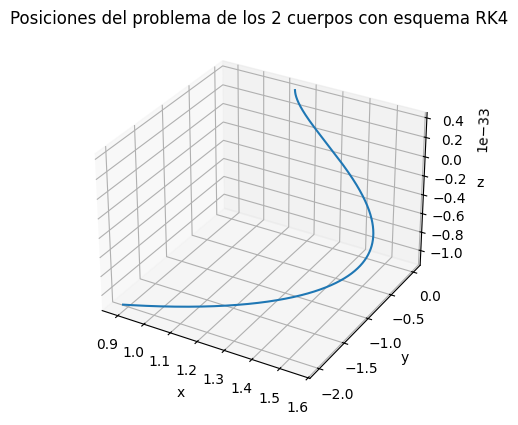

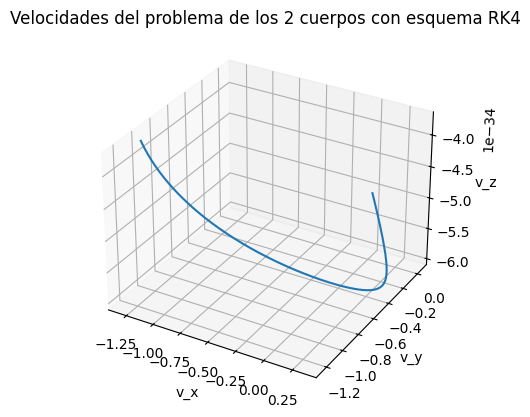

In [29]:
plot_CRTBP_orbits(CRTBP, U0_list, t, RK4, mu=mu)
plot_CRTBP_velocities(CRTBP, U0_list, t, RK4, mu=mu)

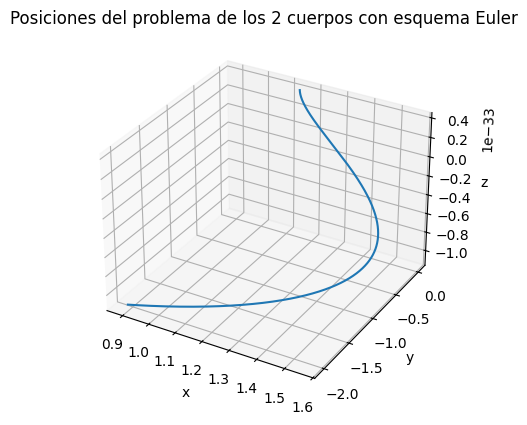

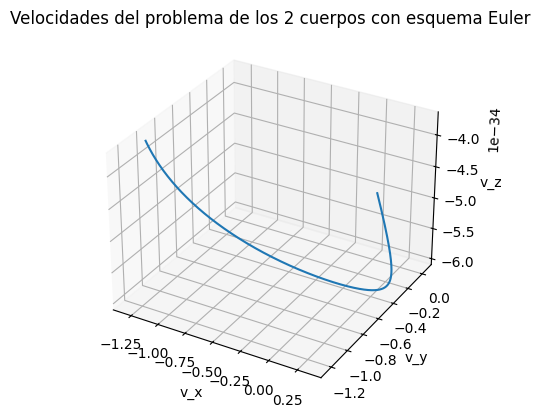

In [14]:
plot_CRTBP_orbits(CRTBP, U0_list, t, Euler)
plot_CRTBP_velocities(CRTBP, U0_list, t, Euler)

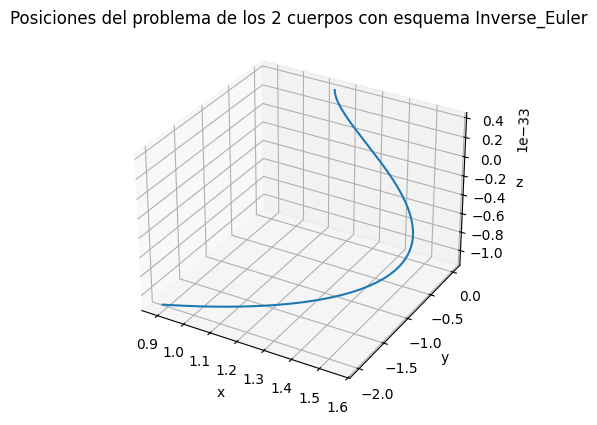

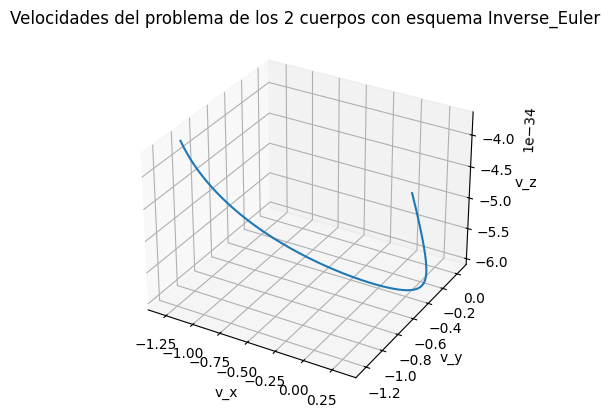

In [9]:
plot_CRTBP_orbits(CRTBP, U0_list, t, Inverse_Euler, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)
plot_CRTBP_velocities(CRTBP, U0_list, t, Inverse_Euler, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)

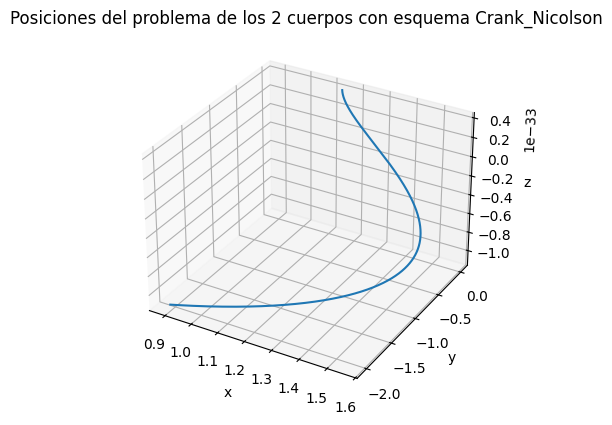

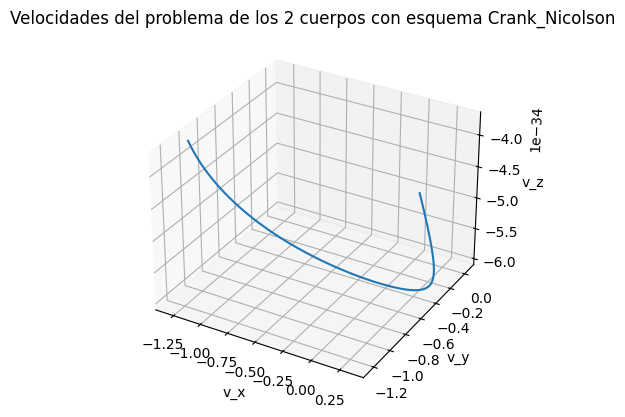

In [10]:
plot_CRTBP_orbits(CRTBP, U0_list, t, Crank_Nicolson, mu=mu, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)
plot_CRTBP_velocities(CRTBP, U0_list, t, Crank_Nicolson, mu=mu, tol_jacobian=tol_jacobian, newton_tol=newton_tol, N_max=N_max)

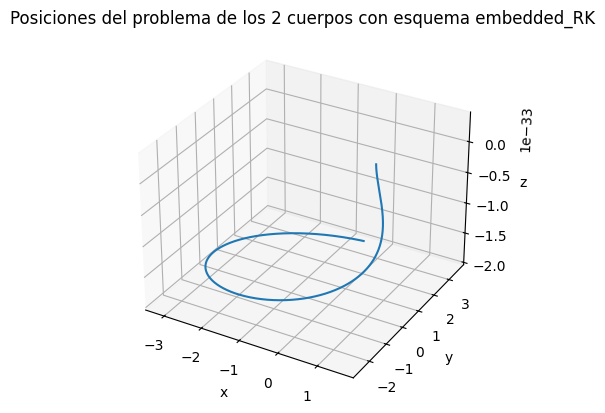

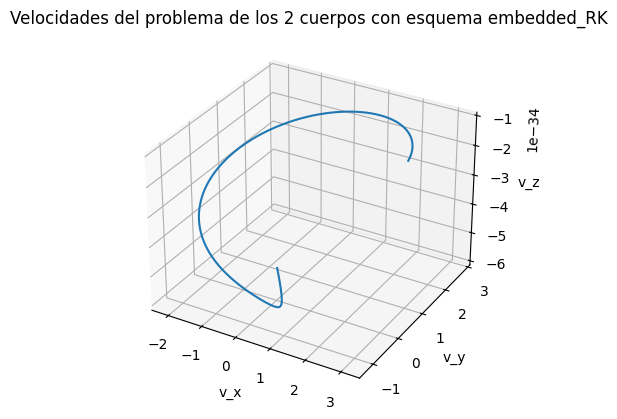

In [8]:
e, a, b1, b2, c, q = Butcher_tableau("Dormand-Prince")
t = linspace(0, 10, 1000)
plot_CRTBP_orbits(CRTBP, U0_list, t, embedded_RK, N_body=2, e=e, butcher_array=a, b_1=b1, b_2=b2, c=c, q=q, ERK_tol=1e-6)
plot_CRTBP_velocities(CRTBP, U0_list, t, embedded_RK, N_body=2, e=e, butcher_array=a, b_1=b1, b_2=b2, c=c, q=q, ERK_tol=1e-6)